## make sure you have all libraries installed. 
use conda environment: /scratch/da2734/twitter/worldbank_twitter_environment.yml

# loading random and filtered samples

In [1]:
# filtered contains 0.8G of data!!
import time
start_time = time.time()
import pyarrow.parquet as pq
from glob import glob
import os
country_code = 'US'
month = '2012-1'
path_to_data = '/scratch/spf248/twitter/data/classification/US/filtered_1perct_sample//'
tweets_filtered=pq.ParquetDataset(glob(os.path.join(path_to_data,                                           
#                                            country_code,
#                                            month,
                                           '*.parquet'))).read().to_pandas()
tweets_filtered['tweet_id'] = tweets_filtered['tweet_id'].astype(int)
print('time taken to load keyword filtered sample:', str(time.time() - start_time), 'seconds')
print(tweets_filtered.shape)

time taken to load keyword filtered sample: 20.07100820541382 seconds
(962156, 11)


In [20]:
tweets_filtered.head()

,tweet_id,text,fired,hired,job,laid_off,position,quit,unemployed,work,keyword
0,616605000421253120,We appreciate Rep. @PatTiberi ’s support of TP...,False,False,True,False,False,False,False,False,True
1,616605084319768577,@zgebler @Snapchat yeah I've been using it for...,False,False,False,False,False,False,False,True,True
2,616605474465652737,"RT @JoshCountBands: If you broke , get a job 📝💰💸",False,False,True,False,False,False,False,False,True
3,616606581422223360,RT @ReutersBiz: June jobs report: Economy adds...,False,False,True,False,False,False,False,False,True
4,616607403853754373,Join the Starbucks team! See our latest #Busin...,False,False,True,False,False,False,False,False,True


In [2]:
# random contains 0.8G of data!!
import time
start_time = time.time()
import pyarrow.parquet as pq
from glob import glob
import os
country_code = 'US'
month = '2012-1'
path_to_data = '/scratch/spf248/twitter/data/classification/US/random_1perct_sample/'
tweets_random=pq.ParquetDataset(glob(os.path.join(path_to_data,                                           
#                                            country_code,
#                                            month,
                                           '*.parquet'))).read().to_pandas()
tweets_random['tweet_id'] = tweets_random['tweet_id'].astype(int)
print('time taken to load random sample:', str(time.time() - start_time), 'seconds')
print(tweets_random.shape)

time taken to load random sample: 3.4117417335510254 seconds
(935202, 11)


In [3]:
boundary = {
    'random':{
        "is_unemployed": 0.8,
         "lost_job_1mo": 0.85,
         "job_search": 1.0,
         "is_hired_1mo": 0.95,
         "job_offer": 1.0}
    ,
    'filtered': {
        "is_unemployed": 0.9,
         "lost_job_1mo": 0.75,
         "job_search": 0.85,
         "is_hired_1mo": 0.95,
         "job_offer": 1.0}
}

is_unemployed
time taken to load filtered sample: 1.478482723236084 seconds (962156, 3)
time taken to load random sample: 1.6519992351531982 seconds (935202, 3)
time taken to merge: 0.5551207065582275 seconds (962156, 13)
time taken to merge: 0.4480423927307129 seconds (962156, 13)
time taken to dump: 1.0058796405792236 seconds
is_unemployed
is_unemployed
is_unemployed filtered subtraction time taken: 9.5367431640625e-07 seconds
is_unemployed filtered sorting time taken: 0.28853344917297363 seconds
is_unemployed filtered write csv time taken: 0.04168415069580078 seconds
is_unemployed random subtraction time taken: 9.5367431640625e-07 seconds
is_unemployed random sorting time taken: 0.22008275985717773 seconds
is_unemployed random write csv time taken: 0.005423545837402344 seconds
lost_job_1mo
time taken to load filtered sample: 1.2472269535064697 seconds (962156, 3)
time taken to load random sample: 1.2288403511047363 seconds (935202, 3)
time taken to merge: 0.4728693962097168 seconds 

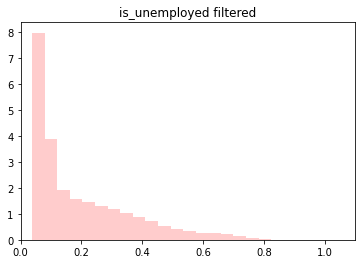

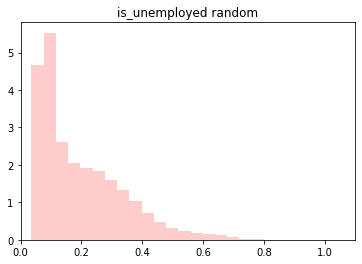

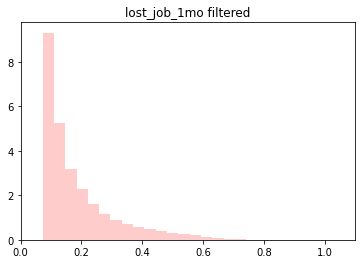

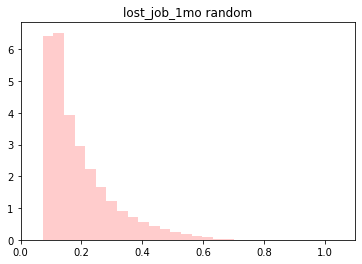

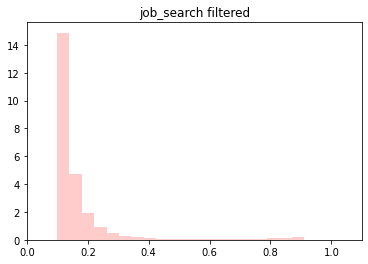

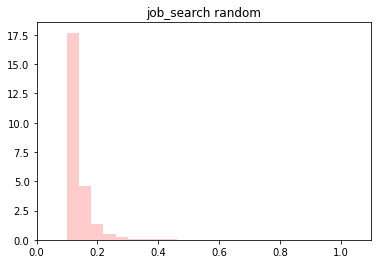

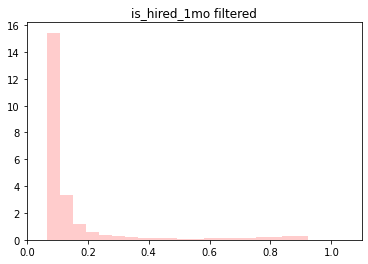

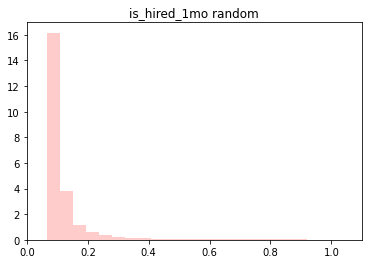

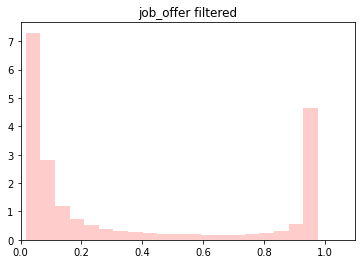

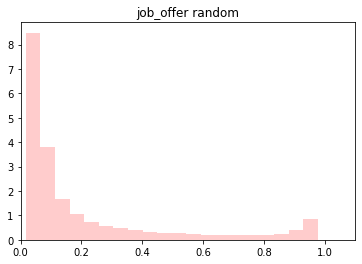

In [4]:
# all in one loop
import glob
import pandas as pd
import time
import pickle
import matplotlib.pyplot as plt

boundary_dict = {
    'random':{
        "is_unemployed": 0.9,
         "lost_job_1mo": 0.85,
         "job_search": 1.0,
         "is_hired_1mo": 0.95,
         "job_offer": 1.0
    },
    'filtered': {
        "is_unemployed": 0.8,
         "lost_job_1mo": 0.75,
         "job_search": 0.85,
         "is_hired_1mo": 0.95,
         "job_offer": 1.0
    }
}

all_tweets_for_sam = pd.DataFrame()

for column in ["is_unemployed", "lost_job_1mo", "job_search", "is_hired_1mo", "job_offer"]:
    print(column)
    start_time = time.time()
    model_output_path = '/scratch/da2734/twitter/jobs/running_on_200Msamples/pred_output_1pct_sample/{}/'.format(column)
#     print(glob.glob(model_output_path+'filtered*.csv'))
    model_output_filtered = pd.concat([pd.read_csv(f) for f in glob.glob(model_output_path+'filtered*.csv')], ignore_index = True)
    print('time taken to load filtered sample:', str(time.time() - start_time), 'seconds', model_output_filtered.shape)

    start_time = time.time()
    model_output_random = pd.concat([pd.read_csv(f) for f in glob.glob(model_output_path+'random*.csv')], ignore_index = True)
    print('time taken to load random sample:', str(time.time() - start_time), 'seconds', model_output_random.shape)


    start_time = time.time()
    merged_filtered = pd.merge(model_output_filtered, tweets_filtered, how='inner', on = 'tweet_id')
    print('time taken to merge:', str(time.time() - start_time), 'seconds', merged_filtered.shape)

    start_time = time.time()
    merged_random = pd.merge(model_output_random, tweets_random, how='inner', on = 'tweet_id')
    print('time taken to merge:', str(time.time() - start_time), 'seconds', merged_filtered.shape)

    start_time = time.time()
    pickle.dump( merged_filtered, open( "./pickles/{}_merged_filtered_1pct.pkl".format(column), "wb" ) )
    pickle.dump( merged_random, open( "./pickles/{}_merged_random_1pct.pkl".format(column), "wb" ) )
    print('time taken to dump:', str(time.time() - start_time), 'seconds')

    merged_filtered = merged_filtered[['tweet_id', 'pos_model', 'text']]
    merged_random   = merged_random[['tweet_id', 'pos_model', 'text']]
    
    print(column)
    fig = plt.figure()
    ax = plt.subplot(111)
    plt.hist(merged_filtered['pos_model'], bins=20, density = True, color = 'red', alpha = 0.2)
    plt.title(column+' filtered')
#     ax.set_yscale('log')
    plt.xlim(0,1.1)
    
    fig = plt.figure()
    ax = plt.subplot(111)
    plt.hist(merged_random['pos_model'], bins=20, density = True, color = 'red', alpha = 0.2)
    plt.title(column+' random')
#     ax.set_yscale('log')
    plt.xlim(0,1.1)
    
    print(column)
    start_time = time.time()
    
#     sort_merged_filtered = merged_filtered.sort_values(by=['pos_model'], ascending=False)
#     sort_merged_filtered['tweet_id'] = sort_merged_filtered.index
#     print('filtered', sort_merged_filtered[['pos_model', 'text']].head())
#     sort_merged_filtered = sort_merged_filtered[['tweet_id', 'pos_model', 'text']]
#     sort_merged_filtered.head(1000).to_csv('csv/filtered_{}_pos_1000.csv'.format(column), index = False)
# #     print('filtered', sort_merged_filtered.head())

# #     sort_merged_filtered = merged_filtered.sort_values(by=['pos_model'], ascending=True)
# #     sort_merged_filtered.head(100).to_csv('csv/filtered_{}_neg_100.csv'.format(column))
# #     print(sort_merged_filtered.head())
#     print('time taken to save csv:', str(time.time() - start_time), 'seconds')

#     print(column)
#     start_time = time.time()
#     sort_merged_random = merged_random.sort_values(by=['pos_model'], ascending=False)
#     sort_merged_random['tweet_id'] = sort_merged_random.index
#     print('random', sort_merged_random[['pos_model', 'text']].head())
#     sort_merged_random = sort_merged_random[['tweet_id', 'pos_model', 'text']]
#     sort_merged_random.head(1000).to_csv('csv/random_{}_pos_1000.csv'.format(column), index = False)

    
# #     sort_merged_random = merged_random.sort_values(by=['pos_model'], ascending=True)
# #     sort_merged_random.head(100).to_csv('csv/random_{}_neg_100.csv'.format(column))
# #     print(sort_merged_random.head())
#     print('time taken to save csv:', str(time.time() - start_time), 'seconds')


    ### boundary save 
    
    boundary = boundary_dict['filtered'][column]
    merged_filtered['dist_point{}'.format(boundary)] = abs(merged_filtered['pos_model'] - boundary)

    start_time = time.time()
    print(column, 'filtered subtraction time taken:', str(time.time() - start_time), 'seconds')

    start_time = time.time()
    merged_filtered = merged_filtered.sort_values(by=['dist_point{}'.format(boundary)], ascending=True)
    print(column, 'filtered sorting time taken:', str(time.time() - start_time), 'seconds')

    start_time = time.time()
    merged_filtered[:500].to_csv('csv/final_boundary_filtered_{}_point_{}.csv'.format(column, boundary))
    # print(all_filtered_boundary['text'])
    print(column, 'filtered write csv time taken:', str(time.time() - start_time), 'seconds')

    all_tweets_for_sam = pd.concat([all_tweets_for_sam, merged_filtered[:500]])
    
    boundary = boundary_dict['random'][column]
    merged_random['dist_point{}'.format(boundary)] = abs(merged_random['pos_model'] - boundary)

    start_time = time.time()
    print(column, 'random subtraction time taken:', str(time.time() - start_time), 'seconds')

    start_time = time.time()
    merged_random = merged_random.sort_values(by=['dist_point{}'.format(boundary)], ascending=True)
    print(column, 'random sorting time taken:', str(time.time() - start_time), 'seconds')

    start_time = time.time()
    merged_random[:500].to_csv('csv/final_boundary_random_{}_point_{}.csv'.format(column, boundary))
    # print(all_random_boundary['text'])
    print(column, 'random write csv time taken:', str(time.time() - start_time), 'seconds')   
    
    all_tweets_for_sam = pd.concat([all_tweets_for_sam, merged_random[:500]])
    
    
#     break

In [17]:
all_tweets_for_sam.shape

(5000, 9)

In [5]:
all_tweets_for_sam.head()

,tweet_id,pos_model,text,dist_point0.8,dist_point0.9,dist_point0.75,dist_point0.85,dist_point1.0,dist_point0.95
488872,396071239120609280,0.800011,😩 I'm lonely and I don't want to do homework,0.000011,NaN,NaN,NaN,NaN,NaN
534309,523327454367084544,0.800014,I Needa Find Myself A Job. Hate Being Broke 😒,0.000014,NaN,NaN,NaN,NaN,NaN
679729,372867011506110464,0.800034,lol if this doesn't work im dropping out,0.000034,NaN,NaN,NaN,NaN,NaN
499386,410549179786989569,0.799964,ugh dude i don't wanna work,0.000036,NaN,NaN,NaN,NaN,NaN
559529,378849057868771328,0.800086,So I just quit my job.,0.000086,NaN,NaN,NaN,NaN,NaN


In [6]:
# all_tweets_for_sam['tweet_id'] = all_tweets_for_sam.index
all_tweets_for_sam = all_tweets_for_sam[['tweet_id', 'text']]
print(all_tweets_for_sam.shape)
all_tweets_for_sam.head()

(5000, 2)


,tweet_id,text
488872,396071239120609280,😩 I'm lonely and I don't want to do homework
534309,523327454367084544,I Needa Find Myself A Job. Hate Being Broke 😒
679729,372867011506110464,lol if this doesn't work im dropping out
499386,410549179786989569,ugh dude i don't wanna work
559529,378849057868771328,So I just quit my job.


In [8]:
pickle.dump( all_tweets_for_sam, open( "export/all_tweets_for_sam_iteration1.pickle", "wb" ) )
all_tweets_for_sam.to_parquet('export/all_tweets_for_sam_iteration1.parquet')
all_tweets_for_sam.to_csv('export/all_tweets_for_sam_iteration1.csv', index = False)

In [9]:
# entropy
import glob
import pandas as pd
import time
import pickle
import matplotlib.pyplot as plt
import numpy as np

boundary = 0.5

for column in ["is_unemployed", "lost_job_1mo", "job_search", "is_hired_1mo", "job_offer"]:
    print(column)
    start_time = time.time()
    model_output_path = '/scratch/da2734/twitter/running_on_200Msamples/pred_output/{}/'.format(column)
    model_output_filtered = pd.concat([pd.read_csv(f) for f in glob.glob(model_output_path+'filtered*.csv')], ignore_index = True)
    print('time taken to load filtered sample:', str(time.time() - start_time), 'seconds', model_output_filtered.shape)


    start_time = time.time()
    model_output_random = pd.concat([pd.read_csv(f) for f in glob.glob(model_output_path+'random*.csv')], ignore_index = True)
    print('time taken to load random sample:', str(time.time() - start_time), 'seconds', model_output_random.shape)


    start_time = time.time()
    merged_filtered = pd.merge(model_output_filtered, tweets_filtered, how='inner', on = 'tweet_id')
    print('time taken to merge:', str(time.time() - start_time), 'seconds', merged_filtered.shape)

    start_time = time.time()
    merged_random = pd.merge(model_output_random, tweets_random, how='inner', on = 'tweet_id')
    print('time taken to merge:', str(time.time() - start_time), 'seconds', merged_filtered.shape)

    start_time = time.time()
    pickle.dump( merged_filtered, open( "./top_tweets/{}_merged_filtered.pkl".format(column), "wb" ) )
    pickle.dump( merged_random, open( "./top_tweets/{}_merged_random.pkl".format(column), "wb" ) )
    print('time taken to dump:', str(time.time() - start_time), 'seconds')

    merged_filtered = merged_filtered[['neg_model', 'pos_model', 'text']]
    merged_random   = merged_random[['neg_model', 'pos_model', 'text']]
    
#     merged_random = merged_random[merged_random['pos_model'] > 0.5 ]

    merged_filtered['entropy'] = - merged_filtered['pos_model']*(np.log(merged_filtered['pos_model']))
    merged_random['entropy'] = - merged_random['pos_model']*(np.log(merged_random['pos_model']))
    
#     merged_filtered = merged_filtered[merged_filtered['pos_model'] > 0.5 ]

    
    print(column)
    fig = plt.figure()
    ax = plt.subplot(111)
#     plt.hist(merged_filtered['pos_model'], bins=20, density = True, color = 'red', alpha = 0.2)
    plt.hist(merged_filtered['entropy'], bins=20, density = True, color = 'red', alpha = 0.2)    
    plt.title(column+' filtered')
#     ax.set_yscale('log')
#     plt.xlim(0,1.1)
    
    fig = plt.figure()
    ax = plt.subplot(111)
    plt.hist(merged_random['entropy'], bins=20, density = True, color = 'red', alpha = 0.2)
#     plt.hist(merged_random['pos_model'], bins=20, density = True, color = 'red', alpha = 0.2)
    plt.title(column+' random')
#     ax.set_yscale('log')
#     plt.xlim(0,1.1)
    
#     print(column)
#     start_time = time.time()
#     sort_merged_filtered = merged_filtered.sort_values(by=['pos_model'], ascending=False)
#     sort_merged_filtered.head(100).to_csv('top_tweets/filtered_{}_pos_100.csv'.format(column))
#     print(sort_merged_filtered.head())
    
#     sort_merged_filtered = merged_filtered.sort_values(by=['pos_model'], ascending=True)
#     sort_merged_filtered.head(100).to_csv('top_tweets/filtered_{}_neg_100.csv'.format(column))
#     print(sort_merged_filtered.head())
#     print('time taken to save csv:', str(time.time() - start_time), 'seconds')

#     print(column)
#     start_time = time.time()
#     sort_merged_random = merged_random.sort_values(by=['pos_model'], ascending=False)
#     sort_merged_random.head(100).to_csv('top_tweets/random_{}_pos_100.csv'.format(column))
#     print(sort_merged_random.head())
    
#     sort_merged_random = merged_random.sort_values(by=['pos_model'], ascending=True)
#     sort_merged_random.head(100).to_csv('top_tweets/random_{}_neg_100.csv'.format(column))
#     print(sort_merged_random.head())
#     print('time taken to save csv:', str(time.time() - start_time), 'seconds')


#     merged_filtered['dist_point5'] = abs(merged_filtered['pos_model'] - boundary)

#     start_time = time.time()
#     print(column, 'filtered subtraction time taken:', str(time.time() - start_time), 'seconds')

#     start_time = time.time()
#     merged_filtered = merged_filtered.sort_values(by=['dist_point5'], ascending=True)
#     print(column, 'filtered sorting time taken:', str(time.time() - start_time), 'seconds')

#     start_time = time.time()
#     merged_filtered[:100].to_csv('top_tweets/filtered_{}_point5.csv'.format(column))
#     # print(all_filtered_boundary['text'])
#     print(column, 'filtered write csv time taken:', str(time.time() - start_time), 'seconds')


#     merged_random['dist_point5'] = abs(merged_random['pos_model'] - boundary)

#     start_time = time.time()
#     print(column, 'random subtraction time taken:', str(time.time() - start_time), 'seconds')

#     start_time = time.time()
#     merged_random = merged_random.sort_values(by=['dist_point5'], ascending=True)
#     print(column, 'random sorting time taken:', str(time.time() - start_time), 'seconds')

#     start_time = time.time()
#     merged_random[:100].to_csv('top_tweets/random_{}_point5.csv'.format(column))
#     # print(all_random_boundary['text'])
#     print(column, 'random write csv time taken:', str(time.time() - start_time), 'seconds')    
    
    
#     break